In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl

Reading Iris dataset 

In [65]:
X = pd.read_csv("Iris Dataset.csv")
X.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [66]:
y = X['Species']
X=X.drop(['Species','Id'],axis=1)
X.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Standardizing the data prior to a PCA

In [67]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
print(X_std[0:5])
X_std.shape

[[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]
 [-1.50652052  0.10644536 -1.2844067  -1.31297673]
 [-1.02184904  1.26346019 -1.3412724  -1.31297673]]


(150, 4)

Computing the covarience matrix

In [68]:
X_covarience_matrix = np.cov(X_std.T)
X_covarience_matrix

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

Calculating eigen values and eigen vectors

In [69]:
eig_vals, eig_vecs = np.linalg.eig(X_covarience_matrix)
print('Eigen values ',eig_vals)
print('Eigen vectors ',eig_vecs)

Eigen values  [2.93035378 0.92740362 0.14834223 0.02074601]
Eigen vectors  [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


Make a list of (eigenvalue, eigenvector) tuples

In [70]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

Sort the (eigenvalue, eigenvector) tuples from high to low

In [71]:
eig_pairs.sort(key=lambda x: x[0], reverse=True)
print('Eigen values in desending order:')
for i in eig_pairs:
    print(i[0])

Eigen values in desending order:
2.9303537755893165
0.9274036215173417
0.14834222648163994
0.020746013995596356


In [72]:
total = sum(eig_vals)
var_exp = [(i/total)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print('Varience captured by each components :', var_exp)
print('Cumulative varience :', cum_var_exp)

Varience captured by each components : [72.77045209380132, 23.03052326768064, 3.68383195762739, 0.5151926808906425]
Cumulative varience : [ 72.77045209  95.80097536  99.48480732 100.        ]


The above shows that the first principal component can alone account for 72% of the varience. The first two principal components can explain in total 95% of the varience

In [73]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))
print('Matrix W: ', matrix_w)                      

Matrix W:  [[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


In this way we have reduced our four features into two without losing much information 

In [74]:
Y = X_std.dot(matrix_w)
print(Y[0:5])

[[-2.26454173 -0.5057039 ]
 [-2.0864255   0.65540473]
 [-2.36795045  0.31847731]
 [-2.30419716  0.57536771]
 [-2.38877749 -0.6747674 ]]


Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')


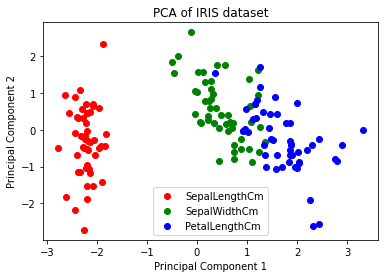

In [75]:
pl.figure()
target_names = X.columns
print(target_names)
for c, i, target_name in zip("rgb",['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], target_names):
    pl.scatter(Y[y==i,0], Y[y==i,1], c=c, label=target_name)
pl.xlabel('Principal Component 1')
pl.ylabel('Principal Component 2')
pl.legend()
pl.title('PCA of IRIS dataset')
pl.show()